**Library**

In [4]:
import pandas as pd
import cv2
from PIL import Image
import numpy as np
import PIL  
import sys, os
from matplotlib import pyplot as plt
import cv2
from numpy import genfromtxt
import difflib
import tensorflow as tf

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
tf.config.list_physical_devices('GPU')

[]

**Create 2 folder of image for noisy and healthy images**

In [6]:
script_dir = sys.path[0]
file_data = open('label (Autosaved).csv')
counter=0
start=0
for row in file_data:
    if(counter>38023):
        break;
    name='block '+str(counter)+'.jpg'
    path='dataset/namkav labeling/block '+str(counter)+'.jpg'
    img_path = os.path.join(script_dir,path)
    image  = Image.open(img_path)   
    #print(row=='1\n')
    if(row=='1\n'):
        path='data/noisy/'+name
        img_path = os.path.join(script_dir,path)
        image = image.save(img_path)
    elif(row=='0\n'):
        path='data/healthy/'+name
        img_path = os.path.join(script_dir,path)
        image = image.save(img_path)
    #print(row)
    if(start!=0):
        counter+=1
        #print(row)
    else:
        start+=1



**Remove dodgy images**

In [252]:
import cv2
import imghdr

In [436]:
data_dir = 'data' 

In [437]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [438]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

**Load Data**

In [439]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [440]:
data = tf.keras.utils.image_dataset_from_directory('data',shuffle=True,image_size=(96, 96))

Found 29160 files belonging to 2 classes.


In [444]:
data_iterator = data.as_numpy_iterator()

In [445]:
batch = data_iterator.next()

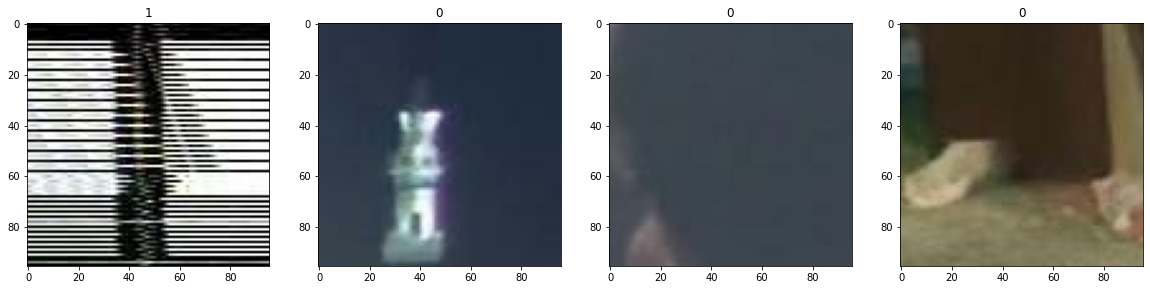

In [446]:
#class1 = noisy images    and     class0 = healthy images
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

**Scale Data**

In [447]:
data = data.map(lambda x,y: (x/255, y))

In [448]:
data.as_numpy_iterator().next()

(array([[[[0.90588236, 0.92941177, 0.92156863],
          [0.87058824, 0.89411765, 0.8862745 ],
          [0.8117647 , 0.8352941 , 0.827451  ],
          ...,
          [0.95686275, 0.972549  , 0.96862745],
          [0.9098039 , 0.9254902 , 0.92156863],
          [0.8745098 , 0.8901961 , 0.8862745 ]],
 
         [[0.58431375, 0.60784316, 0.6       ],
          [0.5803922 , 0.6039216 , 0.59607846],
          [0.57254905, 0.59607846, 0.5882353 ],
          ...,
          [0.9843137 , 1.        , 0.99607843],
          [0.96862745, 0.9843137 , 0.98039216],
          [0.9490196 , 0.9647059 , 0.9607843 ]],
 
         [[0.9254902 , 0.9490196 , 0.9411765 ],
          [0.8666667 , 0.8901961 , 0.88235295],
          [0.78039217, 0.8039216 , 0.79607844],
          ...,
          [0.9647059 , 0.98039216, 0.9764706 ],
          [0.92941177, 0.94509804, 0.9411765 ],
          [0.9019608 , 0.91764706, 0.9137255 ]],
 
         ...,
 
         [[0.61960787, 0.6392157 , 0.6156863 ],
          [0.61960

**Split Data**

In [449]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [450]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

**Build Deep Learning Model**

In [451]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras import layers

In [452]:
model = Sequential()

In [453]:
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(96,96,3)))
model.add(MaxPooling2D())
model.add(layers.Dropout(0.1))

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(layers.Dropout(0.1))

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(layers.Dropout(0.1))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [454]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [455]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 47, 47, 32)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 47, 47, 32)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 22, 22, 64)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 22, 22, 64)      

**Train**

In [456]:
logdir='logs'

In [457]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [458]:
hist = model.fit(train, epochs=7, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/7
638/638 [==============================] - 138s 216ms/step - loss: 0.2090 - accuracy: 0.9052 - val_loss: 0.1406 - val_accuracy: 0.9423
Epoch 2/7
638/638 [==============================] - 143s 225ms/step - loss: 0.1482 - accuracy: 0.9395 - val_loss: 0.1249 - val_accuracy: 0.9505
Epoch 3/7
638/638 [==============================] - 145s 228ms/step - loss: 0.1235 - accuracy: 0.9506 - val_loss: 0.1101 - val_accuracy: 0.9523
Epoch 4/7
638/638 [==============================] - 143s 225ms/step - loss: 0.1129 - accuracy: 0.9581 - val_loss: 0.1030 - val_accuracy: 0.9631
Epoch 5/7
638/638 [==============================] - 145s 228ms/step - loss: 0.1209 - accuracy: 0.9548 - val_loss: 0.1118 - val_accuracy: 0.9622
Epoch 6/7
638/638 [==============================] - 153s 240ms/step - loss: 0.0993 - accuracy: 0.9644 - val_loss: 0.1043 - val_accuracy: 0.9677
Epoch 7/7
638/638 [==============================] - 145s 227ms/step - loss: 0.0907 - accuracy: 0.9671 - val_loss: 0.0969 - val_ac

**Plot Performance**

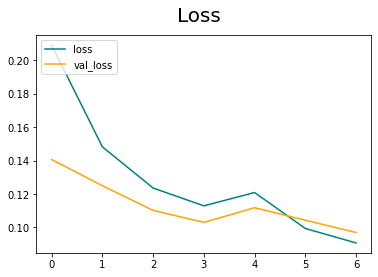

In [459]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

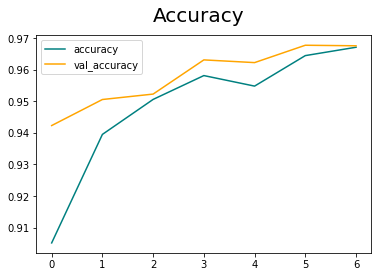

In [460]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

**Evaluate**

In [461]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [462]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [463]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 39ms/step


In [471]:
print("Test Part")
print("Precision: ",pre.result().numpy(),"    ", "Recall: ", re.result().numpy(),"    ", "Accuracy: ",acc.result().numpy())

Test Part
Precision:  0.92748094      Recall:  0.86170214      Accuracy:  0.96016484


**Test**

In [534]:
import cv2

In [535]:
def predictQualityofnoise(model,image_dir):
    image = cv2.imread(image_dir)
    windowsize_r=96
    windowsize_c=96
    counter=0
    score=0
    for r in range(0,image.shape[0] - windowsize_r, windowsize_r):
        for c in range(0,image.shape[1] - windowsize_c, windowsize_c):
            counter+=1
            window =image[r:r+windowsize_r,c:c+windowsize_c]
            im = Image.fromarray(window)
            resize = tf.image.resize(im, (96,96))
            yhat = model.predict(np.expand_dims(resize/255, 0))
            if yhat > 0.5: 
                print(f'have noise')
            else:
                print(f'have not noise')
                score+=1
    #print(score,"  ",counter)
    return score/counter*5   
    

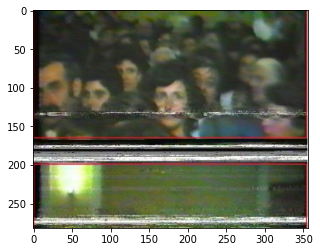

1/1 [==============================] - 0s 18ms/step
have not noise
1/1 [==============================] - 0s 27ms/step
have not noise
1/1 [==============================] - 0s 19ms/step
have not noise
1/1 [==============================] - 0s 30ms/step
have noise
1/1 [==============================] - 0s 26ms/step
have noise
1/1 [==============================] - 0s 20ms/step
have noise
The quality of image TEST4 is  2.5  out of 5


In [542]:
img = cv2.imread('test4.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
print("The quality of image TEST4 is ", predictQualityofnoise(model,"test4.jpg"), " out of 5")

1/1 [==============================] - 0s 24ms/step
have noise
1/1 [==============================] - 0s 26ms/step
have noise
1/1 [==============================] - 0s 22ms/step
have noise
1/1 [==============================] - 0s 24ms/step
have noise
1/1 [==============================] - 0s 20ms/step
have noise
1/1 [==============================] - 0s 26ms/step
have noise
The quality of image TEST8 is  0.0  out of 5


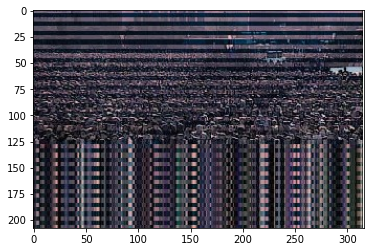

In [545]:
img = cv2.imread('test8.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img = cv2.imread('test8.jpg')
print("The quality of image TEST8 is ", predictQualityofnoise(model,"test8.jpg"), " out of 5")

In [76]:
from tensorflow.keras.models import load_model


In [77]:
model.save(os.path.join('models','imageclassifier.h5'))

In [78]:
new_model = load_model('models/imageclassifier.h5')